In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from qiskit import QuantumRegister, QuantumCircuit
from qiskit import Aer
from qiskit.visualization import plot_state_city
import qiskit.quantum_info as qi

from qelvin import QRegister, QCircuit
import matplotlib.pyplot as plt

# Quantum Fourier Transform squarer

[ 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 
 0.000+0.000*j  0.000+0.000*j  0.000+0.000*j 

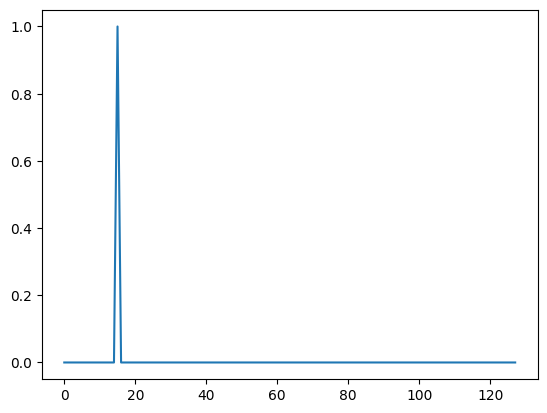

In [15]:
N_x = 3
N_fft = 4
N = N_x+N_fft

psi = QRegister(N, 0b1000111)
circ = QCircuit(psi)

#circ.x(0)

circ.run()

#psi = circ.state()

print(psi)

for j in range(N_x, N):
    for k in range(N_x, j):
        circ.cp(np.pi/float(2**(j-k)), j, k)
    circ.h(j)

for j in range(N_x, N):
    for k in range(0, N_x):
        theta = 2.0*np.pi*2**(-(k+N_x-j+2))
        circ.cp(theta, k, j)

for j in reversed(range(N_x, N)):
    circ.h(j)
    for k in reversed(range(N_x, j)):
        circ.cp(-np.pi/float(2**(j-k)), j, k)

print(circ)

circ.run()

psi_out = circ.state()
print(psi_out)

def plot_states(psi_param):
    states = []
    amps = []
    for i, state in enumerate(psi_param):
        (real, imag) = state
        amp = real*real + imag*imag
        states.append(i)
        amps.append(amp)
        if amp > 0.01:
            print(bin(i))
    plt.plot(states, amps)

plot_states(psi_out)



State before QFT:
Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+

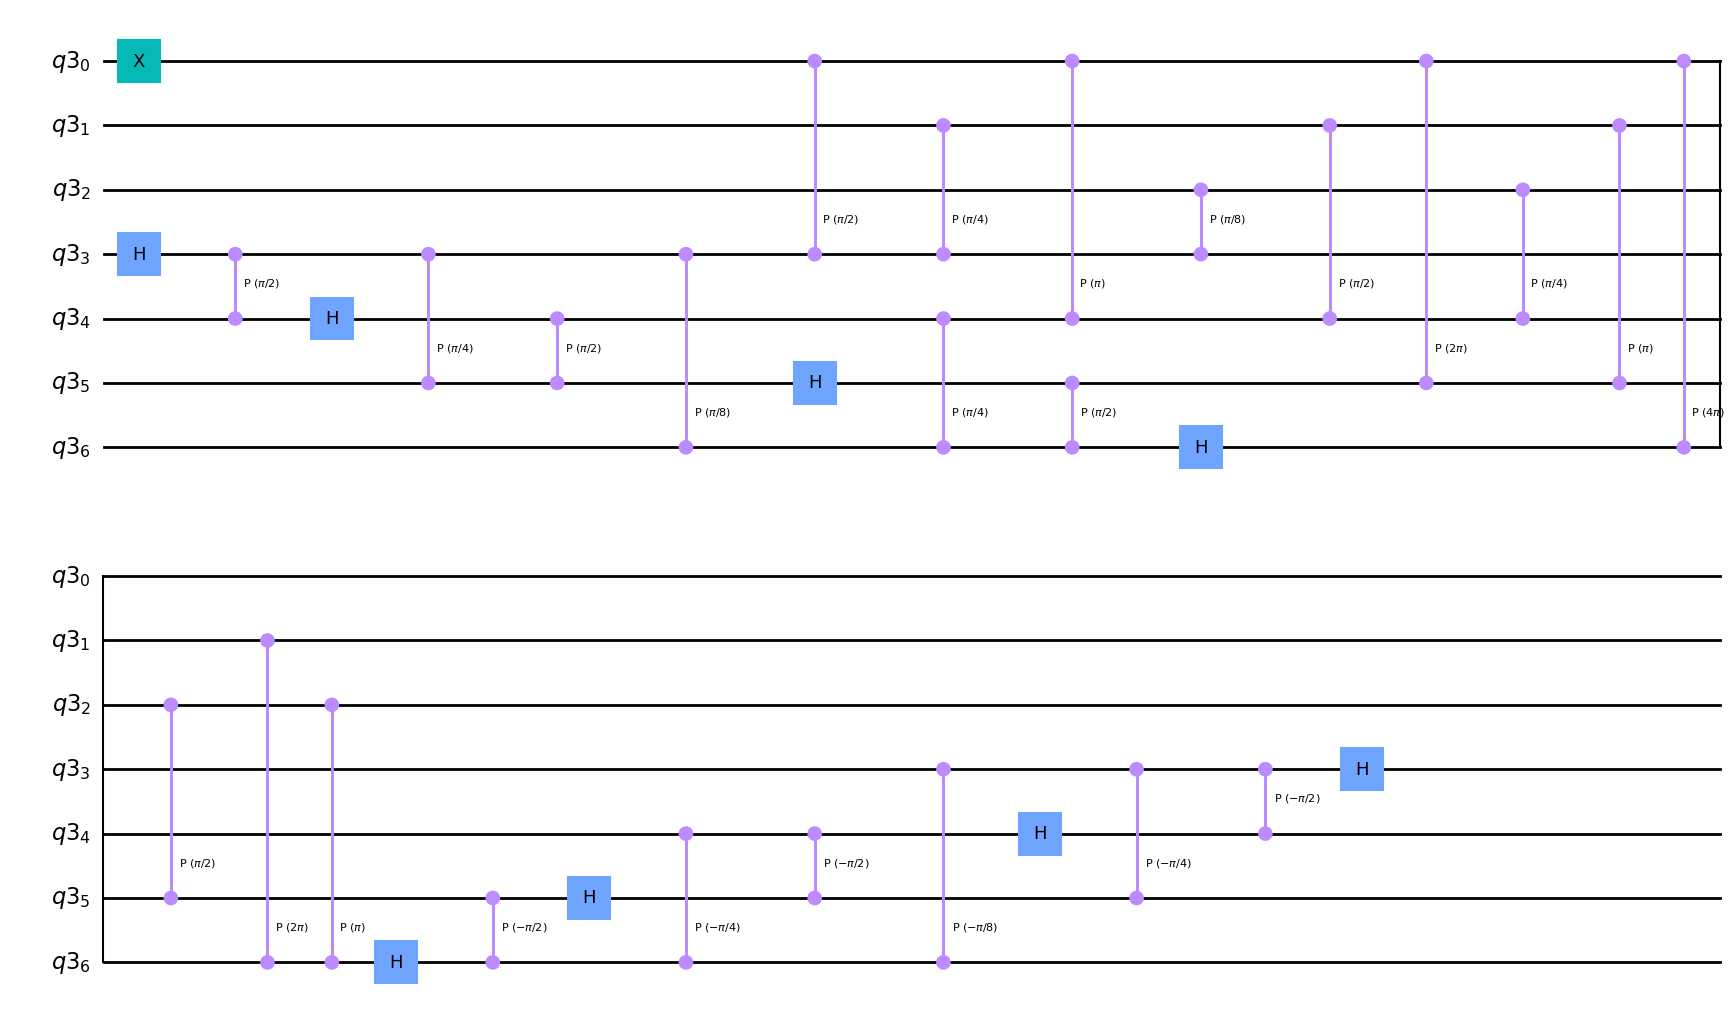

0b10001
State after QFT:
Statevector([ 0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
              0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -0.+0

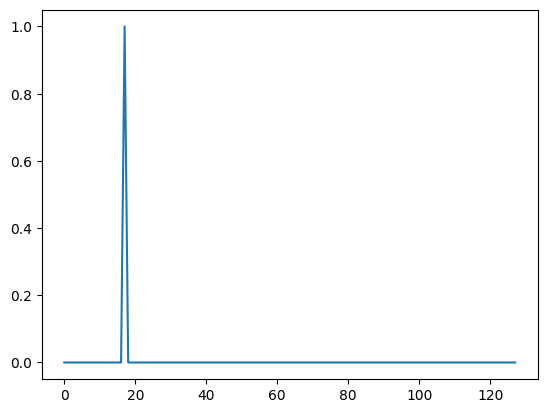

In [8]:
backend = Aer.get_backend('statevector_simulator')

psi = QuantumRegister(N)
circ = QuantumCircuit(psi)

circ.x(psi[0])

print("State before QFT:")
print(qi.Statevector.from_instruction(circ))

for j in range(N_x, N):
    for k in range(N_x, j):
        circ.cp(np.pi/float(2**(j-k)), psi[j], psi[k])
    circ.h(psi[j])


for j in range(N_x, N):
    for k in range(0, N_x):
        theta = 2.0*np.pi*2**(-(k+N_x-j+2))
        circ.cp(theta, psi[k], psi[j])

for j in reversed(range(N_x, N)):
    for k in reversed(range(j+1, N)):
        theta = -2.0*np.pi*2**(-(k-j+1))
        circ.cp(theta, psi[k], psi[j])
    circ.h(psi[j])

display(circ.draw('mpl'))

job = backend.run(circ)

result = job.result()

outputstate_qiskit = result.get_statevector(circ, decimals=3)

for (i, state) in enumerate(outputstate_qiskit):
    if (np.abs(state) > 0.01):
        print(bin(i))
print("State after QFT:")
print(outputstate_qiskit)

def plot_states(psi_param):
    states = []
    amps = []
    for i, state in enumerate(psi_param):
        amp = np.abs(state)*np.abs(state)
        states.append(i)
        amps.append(amp)
        if amp > 0.01:
            print(bin(i))
    plt.plot(states, amps)

plot_states(outputstate_qiskit)